In [262]:
from qiskit import *
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
from qiskit_aer import Aer

1.1. How can we characterize the state of Bobs qubit alone

We can characterize the state of Bobs qubit if use a CX(target=0, control=1) and a CZ(target=0, control=2) gate
for the qubits\
q_0 = superposition qubit (Bob)\
q_1 = Bellstate qubit (Alice)\
q_2 = Bellstate qubit (Alice)


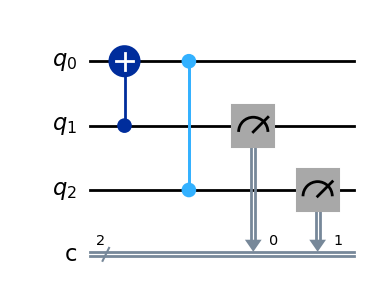

In [263]:
qc = QuantumCircuit(3,2)
qc.cx(1,0)
qc.cz(2,0)
qc.measure([1,2],[0,1])

qc.draw(output='mpl')


1.2. What entanglement measure can quantify how entangled is Bobs qubit with Alices qubits? Calculate this measure.

To measure the entanglement we can calculate the Von Neumann entanglement entropy. Done on Ipad. Maximum entanglement $S =  -ln(1/2) = 1$

1.3. Now Alice measures her two qubits in the computational basis. What happens to Bob's qubit? Is is possible for Bob to infer the state $ \ket{\Psi} $, without having Alice communicate the result of her measurement to him?

Bob's qubit is no longer entangled with Alice's qubits and collapses into one state. It is not possible for Bob to infer the state $\ket{\Psi}$, without having Alice communicate the result of her measurement to him. It looks possible in the shown circuit because of the principle of deferred measurement, where control gates are being used which cannot be used unless both qubits are locally close together, which they are not. Therefore Bob has the $4$ possible states of his qubits and needs Alice measurement to know which operations he needs to do or which state he has.

2.1.1 Using the JW mapping of the creation and annihilation operators $a_i^{\dagger}$ and $a_j$ to qubit operators, write the Hamiltonian in Eq.(3) in terms of tensor products of Pauli operators $\hat{X}$, $\hat{Y}$, $\hat{Z}$ and identity $\hat{1}$

JW mapping\
$a_{i}^{\dagger} = \left(\prod_{j=2L-1}^{i+1} \hat{Z}_{j} \right) \frac{\hat{X}_{i}-i\hat{Y}_{i}}{2}$

$a_{i} = \left(\prod_{j=2L-1}^{i+1} \hat{Z}_{j} \right) \frac{\hat{X}_{i}+i\hat{Y}_{i}}{2}$

$\hat{n}_{i} = a_{i}^{\dagger}a_{i} = \frac{\hat{X}_{i}-i\hat{Y}_{i}}{2}\frac{\hat{X}_{i}+i\hat{Y}_{i}}{2} = \frac{\hat{1}_{i}-\hat{Z}_{i}}{2}$

Eq.(3):\
$\hat{H} = -J \sum_{l=0}^{L-2} \sum_{s=\uparrow, \downarrow} \left(a_{l,s}^{\dagger}a_{l+1,s} + a_{l+1,s}^{\dagger}a_{l,s} \right) + U \sum_{l=0}^{L-1} \hat{n}_{l,\uparrow}\hat{n}_{l,\downarrow}$

$\hat{H} = -J \sum_{i=0}^{2L-3}\left(a_{i}^{\dagger}a_{i+2} + a_{i+2}^{\dagger}a_{i} \right) + U \sum_{i=0}^{2L-1} \hat{n}_{i}\hat{n}_{i+1}$

$\hat{H} = -J \sum_{i=0}^{2L-3} \left(\left(\prod_{j=2L-1}^{i+1} \hat{Z}_{j} \right) \frac{\hat{X}_{i}-i\hat{Y}_{i}}{2} \otimes \left(\prod_{j=2L-1}^{i+1+2} \hat{Z}_{j} \right) \frac{\hat{X}_{i+2}+i\hat{Y}_{i+2}}{2}         + \left(\prod_{j=2L-1}^{i+1+2} \hat{Z}_{j} \right) \frac{\hat{X}_{i+2}-i\hat{Y}_{i+2}}{2} \otimes \left(\prod_{j=2L-1}^{i+1} \hat{Z}_{j} \right) \frac{\hat{X}_{i}+i\hat{Y}_{i}}{2}    \right)+ U \sum_{i=0}^{2L-1} \frac{\hat{1}_{i}\hat{1}_{i+1}-\hat{Z}_{i+1}-\hat{Z}_{i}+\hat{Z}_{i}\hat{Z}_{i+1}}{4} $

$\hat{H} = -J \sum_{i=0}^{2L-3} \left(\hat{Z}_{i+1} \hat{Z}_{i+2}  \frac{\hat{X}_{i}\hat{X}_{i+1}+\hat{Y}_{i}\hat{Y}_{i+1}}{2} \right)+ U \sum_{i=0}^{2L-1} \frac{\hat{1}_{i}\hat{1}_{i+1}-\hat{Z}_{i+1}-\hat{Z}_{i}+\hat{Z}_{i}\hat{Z}_{i+1}}{4} $

2.2.1 What is the expression of the time-evolution operator $U_{LO}(t)$ approximated witha leading-order (LO) Trotter expansion?

$U_{LO}(t) = \left(\prod_{k=1}^L U_k(\Delta _t) \right)^{N_s} = \left(\prod_{k=1}^L e^{-iH_k(\Delta _t)} \right)^{N_s}$

$U_{LO}(t) = \left(\prod_{k=0}^{2L-3} e^{+i\frac{J}{2}\hat{Z}_{i+1}\hat{Z}_{i+2}\hat{X}_{i}\hat{X}_{i+1}(\Delta _t)} e^{+i\frac{J}{2}\hat{Z}_{i+1}\hat{Z}_{i+2}\hat{Y}_{i}\hat{Y}_{i+1}(\Delta _t)} * \prod_{k=0}^{2L-1} e^{-i*\frac{U}{4}\hat{1}_{i}\hat{1}_{i+1}(\Delta _t)} * e^{+i*\frac{U}{4}\hat{1}_{i}\hat{Z}_{i+1}(\Delta _t)} * e^{+i*\frac{U}{4}\hat{Z}_{i}\hat{1}_{i+1}(\Delta _t)} * e^{-i*\frac{U}{4}\hat{Z}_{i}\hat{Z}_{i+1}(\Delta _t)}\right)^{N_s}$

In [264]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate
import numpy as np

Qbits = 8
J = 1.0
U = 3.0


In [265]:
def exp_ZZXX(dt, i):
    label = ['I'] * Qbits
    label[i] = 'X'
    label[i+1] = 'X'
    label[i+2] = 'Z'
    label[i+3] = 'Z'
    pauli_label = ''.join(label[::-1])
    op = SparsePauliOp.from_list([(pauli_label, 1.0)])
    gate = PauliEvolutionGate(op, time=+J/2 * dt)

    qc = QuantumCircuit(Qbits)
    qc.append(gate, range(Qbits))
    return qc

def exp_ZZYY(dt, i):
    label = ['I'] * Qbits
    label[i] = 'Y'
    label[i+1] = 'Y'
    label[i+2] = 'Z'
    label[i+3] = 'Z'
    pauli_label = ''.join(label[::-1])
    op = SparsePauliOp.from_list([(pauli_label, 1.0)])
    gate = PauliEvolutionGate(op, time=+J/2 * dt)

    qc = QuantumCircuit(Qbits)
    qc.append(gate, range(Qbits))
    return qc

def exp_11(dt, i):
    theta = -U * dt / 4
    qc = QuantumCircuit(Qbits)
    qc.global_phase += theta
    return qc

def exp_1Z(dt, i):
    label = ['I'] * Qbits
    label[i+1] = 'Z'
    pauli_label = ''.join(label[::-1])
    op = SparsePauliOp.from_list([(pauli_label, 1.0)])
    gate = PauliEvolutionGate(op, time=+U/4 * dt)

    qc = QuantumCircuit(Qbits)
    qc.append(gate, range(Qbits))
    return qc

def exp_Z1(dt, i):
    label = ['I'] * Qbits
    label[i] = 'Z'
    pauli_label = ''.join(label[::-1])
    op = SparsePauliOp.from_list([(pauli_label, 1.0)])
    gate = PauliEvolutionGate(op, time=+U/4 * dt)

    qc = QuantumCircuit(Qbits)
    qc.append(gate, range(Qbits))
    return qc

def exp_ZZ(dt, i):
    label = ['I'] * Qbits
    label[i] = 'Z'
    label[i+1] = 'Z'
    pauli_label = ''.join(label[::-1])
    op = SparsePauliOp.from_list([(pauli_label, 1.0)])
    gate = PauliEvolutionGate(op, time=-U/4 * dt)

    qc = QuantumCircuit(Qbits)
    qc.append(gate, range(Qbits))
    return qc

In [ ]:
def trotter_step(dt):
    qc = QuantumCircuit(Qbits)
    L = Qbits // 2
    for i in range(2*L - 3):
        qc.compose(exp_ZZXX(dt, i), inplace=True)
        qc.compose(exp_ZZYY(dt, i), inplace=True)
    for i in range(2*L - 1):
        qc.compose(exp_11(dt, i), inplace=True)
        qc.compose(exp_1Z(dt, i), inplace=True)
        qc.compose(exp_Z1(dt, i), inplace=True)
        qc.compose(exp_ZZ(dt, i), inplace=True)
    return qc

def trotter_evolution(ini_state, t, Ns):
    dt = t / Ns
    qc_total = ini_state.copy()
    for it in range(Ns):
        qc_total.compose(trotter_step(dt), inplace=True)
    return qc_total

ini_state = QuantumCircuit(8)
ini_state.x([0,1,2,5])

trotter_evolution(ini_state, 1, 3)

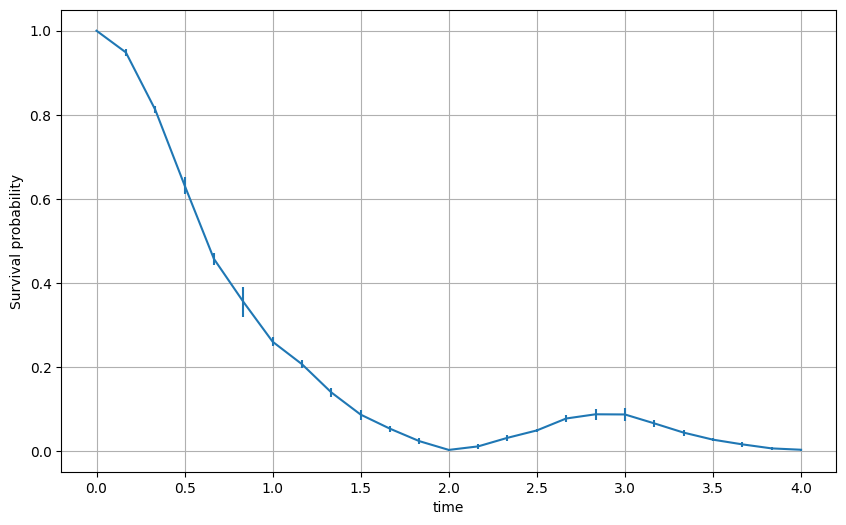

In [ ]:
initial_state = '00100111'
def P_meas(t, Ns, tot_shots=500):
    qc = trotter_evolution(ini_state, t, Ns)
    qc.measure_all()
    simulator = Aer.get_backend('aer_simulator')
    trans_circuit = transpile(qc, backend=simulator)
    job = simulator.run(trans_circuit, shots=tot_shots)
    counts = job.result().get_counts(qc)
    p = counts.get(initial_state, 0)/tot_shots
    return p

t = np.linspace(0, 4, 25)
p_array = []
for l in t:
    p_array.append(P_meas(l,3))

p_mean = []
p_std = []
p_values = []
for l in t:
    for j in range(5):
        p_values.append(P_meas(l,3))
    p_mean.append(np.mean(p_values))
    p_std.append(np.std(p_values))
    p_values = []
# plt.plot(t, p_mean)
plt.figure(figsize=(10, 6))
plt.errorbar(t, p_mean, p_std)
plt.xlabel('time')
plt.ylabel('Survival probability')
plt.grid(True)

In [268]:
from qiskit.quantum_info import Statevector, SparsePauliOp, Operator
from scipy.linalg import expm

def build_hamiltonian(Qbits, J, U):
    terms = []
    coeffs = []

    L = Qbits // 2

    for i in range(2*L - 3):
        #XX
        pauli = ['I'] * Qbits
        pauli[i] = 'X'
        pauli[i+1] = 'X'
        pauli[i+2] = 'Z'
        pauli[i+3] = 'Z'
        terms.append(''.join(pauli[::-1]))
        coeffs.append(+J / 2)

        #YY
        pauli[i] = 'Y'
        pauli[i+1] = 'Y'
        terms.append(''.join(pauli[::-1]))
        coeffs.append(+J / 2)

    for i in range(2*L - 1):
        #IZ
        pauli = ['I'] * Qbits
        pauli[i+1] = 'Z'
        terms.append(''.join(pauli[::-1]))
        coeffs.append(+U / 4)

        #ZI
        pauli = ['I'] * Qbits
        pauli[i] = 'Z'
        terms.append(''.join(pauli[::-1]))
        coeffs.append(+U / 4)

        #ZZ
        pauli[i+1] = 'Z'
        terms.append(''.join(pauli[::-1]))
        coeffs.append(-U / 4)

        #II
        terms.append('I' * Qbits)
        coeffs.append(-U / 4)

    H = SparsePauliOp(terms, coeffs)
    return H

def exact_evolution(H, psi0, t):
    H_mat = Operator(H).data
    U = expm(-1j * H_mat * t)
    psi_t = U @ psi0.data
    return psi_t

def survival_proba(psi0, psit):
    return np.abs(np.vdot(psi0.data, psit))**2


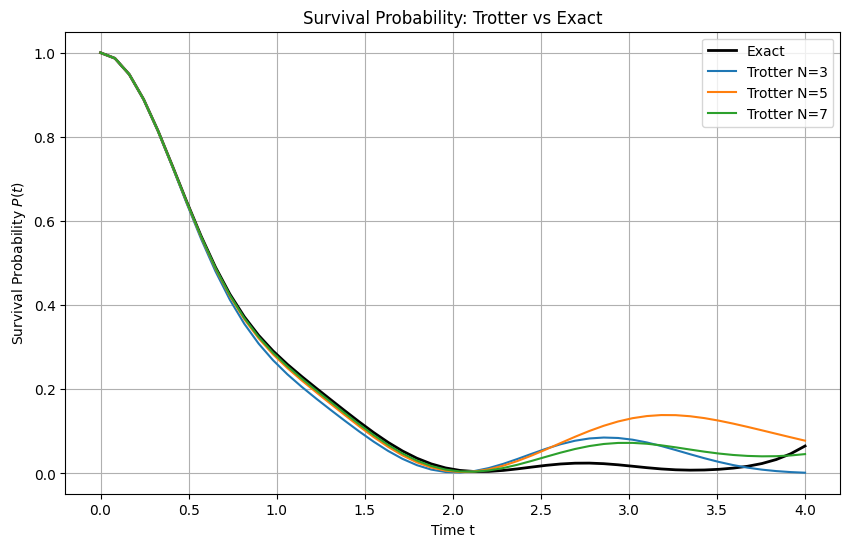

In [269]:
t_values = np.linspace(0, 4, 50)
trotter_steps_list = [3, 5, 7]

ini_state = QuantumCircuit(Qbits)
ini_state.x([0,1,2,5])
psi0 = Statevector.from_instruction(ini_state)
H = build_hamiltonian(Qbits, J, U)

plt.figure(figsize=(10, 6))
exact_probs = []

# Exakte Lösung
for t in t_values:
    psi_exact = exact_evolution(H, psi0, t)
    exact_probs.append(survival_proba(psi0, psi_exact))

plt.plot(t_values, exact_probs, label="Exact", color='black', linewidth=2)

# Trotter-Approximationen
for Ns in trotter_steps_list:
    trotter_probs = []
    for t in t_values:
        trotter_circuit = trotter_evolution(ini_state, t, Ns)
        psi_trotter = Statevector.from_instruction(trotter_circuit)
        trotter_probs.append(survival_proba(psi0, psi_trotter))

    plt.plot(t_values, trotter_probs, label=f"Trotter N={Ns}")

plt.xlabel("Time t")
plt.ylabel("Survival Probability $P(t)$")
plt.title("Survival Probability: Trotter vs Exact")
plt.legend()
plt.grid()
plt.show()

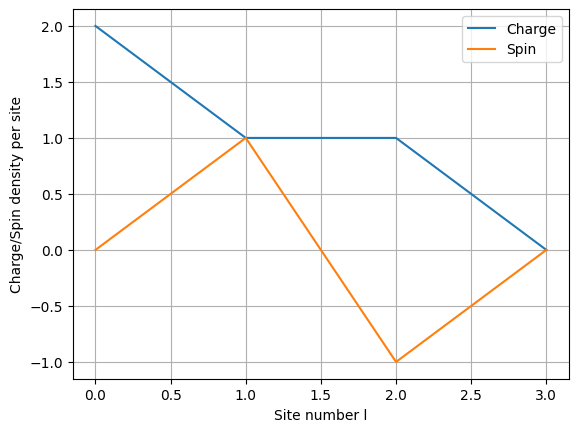

In [286]:
p_charge_dic = {'00':'0', '01':'1','10':'1','11':'2'}
p_spin_dic = {'00':'0', '01':'1','10':'-1','11':'0'}

def Density(l, ini_state, tot_shots=500):
    qc = ini_state.copy()
    cr = ClassicalRegister(2)
    qc.add_register(cr)
    qc.measure(l,0)
    qc.measure(l+1,1)
    simulator = Aer.get_backend('aer_simulator')
    tot_shots=tot_shots
    trans_circuit = transpile(qc, backend=simulator)
    job = simulator.run(trans_circuit, shots=tot_shots)
    obs = job.result().get_counts().most_frequent()
    # data = job.result().data()
    return int(p_charge_dic[obs]), int(p_spin_dic[obs])
ini_state = QuantumCircuit(8)
ini_state.x([0,1,2,5])
charge_array = []
spin_array = []
for i in range(0,len(ini_state.qubits),2):
    charge, spin = Density(i, ini_state)
    charge_array.append(charge)
    spin_array.append(spin)

l = [0,1,2,3]
plt.plot(l, charge_array, label='Charge')
plt.plot(l, spin_array, label='Spin')
plt.xlabel('Site number l')
plt.ylabel('Charge/Spin density per site')
plt.grid(True)
plt.legend()
plt.show()

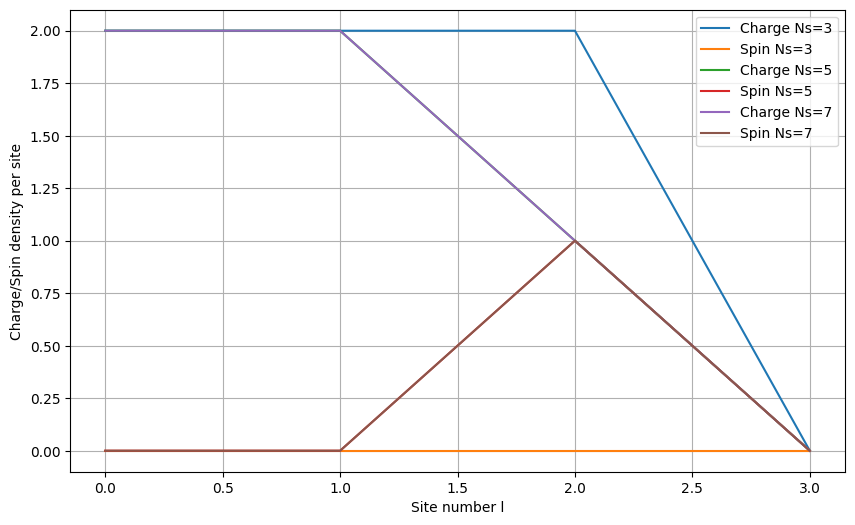

In [306]:
ini_state = QuantumCircuit(8)
ini_state.x([0,1,2,5])
psi0 = Statevector.from_instruction(ini_state)
def P_trotter_evol(Ns):
    qc = trotter_evolution(ini_state, t=2.5, Ns=Ns)
    charge_array = []
    spin_array = [] 
    for i in range(0,len(ini_state.qubits),2):
        charge, spin = Density(i, qc)
        charge_array.append(charge)
        spin_array.append(spin)
    return charge_array, spin_array

charge_trott, spin_trott = P_trotter_evol(3)


l = [0,1,2,3]
plt.figure(figsize=(10,6))
for N in [3,5,7]:
    charge_trott, spin_trott = P_trotter_evol(N)
    plt.plot(l, charge_trott, label=f'Charge Ns={N}')
    plt.plot(l, spin_trott, label=f'Spin Ns={N}')
plt.xlabel('Site number l')
plt.ylabel('Charge/Spin density per site')
plt.grid(True)
plt.legend()
plt.show()
# exact_evolution(H, psi0, 2.5)
